## Practical Number 4
#### Ньяти Каелиле БВТ2201

#### Normal distribution

### Exercise 1, 2, 3

In [1]:
import math, random

#function to generate random numbers according to linear law
def t_normal(k1, k2, k3, k4):
    k1 = random.uniform(0, k1) 
    k2 = random.uniform(0,k2)
    k3 = random.uniform(0,k3)
    k4 = random.uniform(0,k4)

    '''
    k1 = (k1-0)*random.random() + 0
    k2 = (k2-0)*random.random() + 0
    k3 = (k3-0)*random.random() + 0
    k4 = (k4-0)*random.random() + 0
    '''

    return k1+k2+k3+k4

# Function to calculate mean for normal distribution
def mean_theory(k1, k2, k3, k4):
    math_exp = 0.5*(k1 + k2+ k3+ k4)
    return math_exp       

#Function to calculate variance for normal distribution
def variance_theory(k1, k2, k3, k4):
    variance_value = (1/12)*((k1**2) + (k2**2) + (k3**2) + (k4**2))
    return variance_value  
    
#Function to calculate standard deviation
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

#probability distribution function (pdf) for normal distribution
def normal_dis_function(std, expectation, x):
    part_1 = 1/(std*(math.sqrt(2*(math.pi)))) #std is the standard deviation
    part_2 = math.exp((-1/2)*(((x- expectation)/std)**2)) #math_exp is the mathematical expectation
    result = part_1 * part_2
    return result


In [2]:
# Function to calculate mean of a sample
def mean_sample(data):
    return sum(data) / len(data)


# Function to calculate mean of squares of sample
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)


# Function to calculate unbiased sample variance
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)



def relative_error(mean_sample, mean_theory):
    #(max_x+min_x)/2 - theoretical mathematical expectation
    return ((abs(mean_sample - mean_theory)) / mean_theory) * 100  


def relative_err_var(variance, variance_theory):
    if variance is None or variance == 0:
        return None
    #((max_x-min_x)**2)/12 -  theoretical variance
    return ((abs(variance - variance_theory)) / variance_theory) * 100 

def relative_err_std(std_dev_sample, std_dev_theory):
    if std_dev_sample is None or std_dev_sample == 0:
        return None
    return ((abs(std_dev_sample  - std_dev_theory)) / std_dev_theory) * 100  

In [3]:
def simulations(k1, k2, k3, k4, random_numbers):
    
    # Calculate the theoretical expectation
    mean_theory_value = mean_theory(k1, k2, k3, k4)

    # Calculate the sample expectation
    mean_sample_value = mean_sample(random_numbers)

    #Calculate mean of squares
    mean_of_squares_sample_value = mean_of_squares_sample(random_numbers)


    #Calculate the theoretical variance
    variance_theory_value = variance_theory(k1, k2, k3, k4)

    #Calculate the sample variance
    variance_sample_value = unbiased_sample_variance(random_numbers, mean_sample_value, mean_of_squares_sample_value)

    
    # Calculate the theoretical standard deviation
    std_dev_theory = standard_deviation(variance_theory_value)

    #Calculate the sample standard deviation
    std_dev_sample = standard_deviation(variance_sample_value)


    #Relative error for expectation
    relative_err = relative_error(mean_sample_value, mean_theory_value)

    #Relative error for variance
    relative_err_variance = relative_err_var(variance_sample_value, variance_theory_value)

    #Relative error for standard deviation
    relative_err_standard = relative_err_std(std_dev_sample, std_dev_theory)

    
    return mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory, std_dev_sample, relative_err, relative_err_variance, relative_err_standard


In [4]:

def aggregate():

    print("________________________________________________________________________________________________________________________________________________________________________________\n")

    # Display aggregate results
    print(f"After a simulation with {n} random numbers each:")

    print(f"Random numbers: {random_numbers}")
    #print(f"Random numbers: {[f'{num:.2f}' for num in random_numbers]}")

    print(f"Max_Random is {max(random_numbers)}")
    print(f"Min_Random is {min(random_numbers)}\n")

    print(f"Mathematical Expectation (Theoretical): {mean_theory_value}")
    print(f"Mathematical Expectation (Sample): {mean_sample_value}\n")

    print(f"Theoretical Variance: {variance_theory_value}")
    print(f"Unbiased Sample Variance: {variance_sample_value}\n")

    print(f"Theoretical Standard Deviation: {std_dev_theory_value}")
    print(f"Sample Standard Deviation: {std_dev_sample}\n")

    print(f"Relative Error for Mathematical Expectation: {relative_err}%")
    print(f"Relative Error for Standard Deviation: {relative_err_standard}%")
    print(f"Relative Error for Variance: {relative_err_variance}%\n")


In [8]:
import matplotlib.pyplot as plt

def relative_frequencies(random_sample, left_boundary, right_boundary, num_plots):
    # Determine the width of each interval (bin)
    interval_width = (right_boundary - left_boundary) / num_plots
    
    # Initialize a list to hold the frequency count for each interval
    frequency_counts = [0] * num_plots
    
    # Loop through the random sample and count which interval each number falls into
    for num in random_sample:
        # Check if the number is within the specified boundaries
        if left_boundary <= num <= right_boundary:
            # Determine which interval the number falls into
            index = int((num - left_boundary) // interval_width)
            
            # Edge case for the rightmost boundary
            if index == num_plots:
                index -= 1
            
            # Increment the count for that interval
            frequency_counts[index] += 1
    
    # Convert the frequency counts to relative frequencies
    total_numbers = len(random_sample)
    relative_frequencies = [count / total_numbers for count in frequency_counts]
    
    return relative_frequencies


def draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, relative_frequencies, std_dev_theory, mean_theory, std_dev_sample, mean_sample):
    # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Calculate the width of each bar
    bar_width = (right_boundary - left_boundary) / num_plots
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]

    # Create the histogram plot
    plt.figure(figsize=(12, 6))


    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label="Histogram")
    

    # Create x-values for plotting the PDF based on standard deviation and expectation
    '''
    To plot the points, they usually lie within 3 standard deviations from the mean. So we take our minimum at 3 standard 
    deviations from mean_theory, and our maximum from 3 standard deviations after the mean

    100 points are chosen arbitrarily to provide enough resolution for the curve to look smooth.
    '''
    #x_values = [mean_theory - 3 * std_dev_theory + i * (6 * std_dev_theory) / 100 for i in range(100)]
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_values = [normal_dis_function(std_dev_sample, mean_sample, x) for x in x_values]
  
    plt.plot(x_values, y_values, color='blue', label="Sample PDF")

    x_value = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_value = [normal_dis_function(std_dev_theory, mean_theory, x) for x in x_values]
  
    plt.plot(x_value, y_value, color='red', label="Normal PDF")

    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("Random Number")
    plt.ylabel("Relative Frequency / Probability Density")
    plt.legend()
    
    # Show the plot
    plt.show()
    

In [6]:
#For plotting relative error against number of experiments

def draw_graph_err(n_values, errors):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('Number of Experiments (n)')
    plt.ylabel('Relative Error (%)')
    plt.title('Relative Error vs. Number of Experiments')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random numbers: [4.36811869113189, 5.622996443688213, 7.084837552661255, 6.367732045260631, 9.90481482920797, 9.399846272510036, 6.1471745956117045, 5.610491886170273, 9.930510890726186, 8.32565317881379]
Max_Random is 9.930510890726186
Min_Random is 4.36811869113189

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 7.276217638578196

Theoretical Variance: 5.25
Unbiased Sample Variance: 3.9630491199976348

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: 1.9907408470209362

Relative Error for Mathematical Expectation: 11.941809824279932%
Relative Error for Standard Deviation: 13.116946471295766%
Relative Error for Variance: 24.513350095283148%



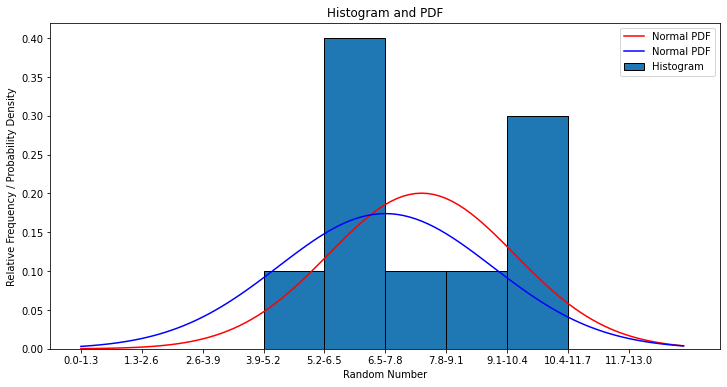

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random numbers: [9.606511151531912, 4.261009569061952, 6.305216790148957, 6.559306062711219, 3.656697772745965, 4.229840258108153, 9.597405563050318, 4.212660680662871, 8.725163377789858, 5.723463703283958, 5.7270501039983746, 6.827685599971054, 2.6644685408924, 3.4859246145190457, 9.949020492590353, 5.8621725521860855, 8.338501277370753, 5.11720702805326, 4.345109353187187, 6.977894067745199]
Max_Random is 9.949020492590353
Min_Random is 2.6644685408924

Mathematical Expectation (Theoretical): 6.5
Mathematical Expectation (Sample): 6.1086154279804425

Theoretical Variance: 5.25
Unbiased Sample Variance: 4.854052263037522

Theoretical Standard Deviation: 2.29128784747792
Sample Standard Deviation: 2.20319138139144

Relative Error for Mathematical Expectation: 6.02

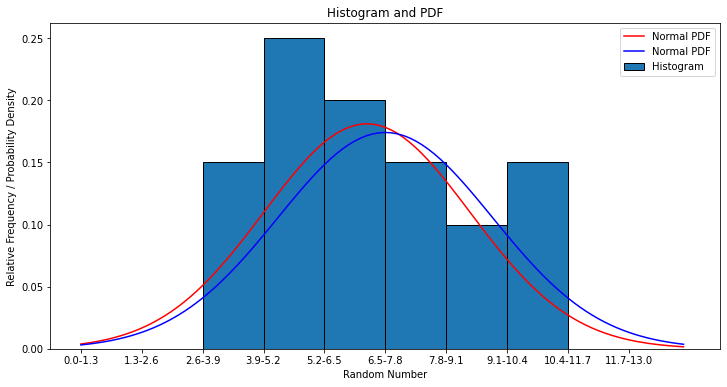

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random numbers: [5.412270220340302, 3.4794247374937255, 5.48335194799686, 8.228760239596262, 6.738605727437814, 5.760106489354887, 4.0144970669595175, 7.856972475889307, 4.684265434062162, 2.6259657873823734, 10.492984610839471, 8.290790684240802, 5.0571479943538336, 7.460572676756234, 8.914541113507513, 7.29622969949, 2.678773744420378, 4.158744696416251, 5.397497809626982, 9.455523133059703, 2.487787005323992, 10.814844527307791, 8.895558416883897, 9.194826911412509, 8.224850600006826, 8.65206661588046, 8.617605817585876, 5.170789599560111, 3.285797658844304, 4.503742514906712, 7.899320478500771, 8.788702730096533, 8.792241475665008, 10.147322307260676, 4.402093720147463, 2.8528965820042584, 3.668290769448385, 7.5873247553675975, 6.918126306042241, 8.17589787800

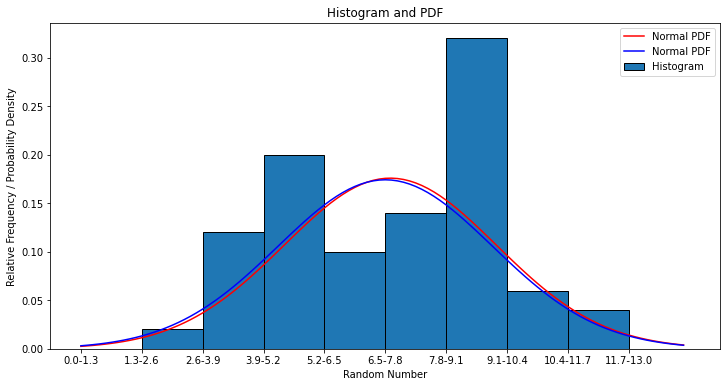

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random numbers: [8.0518551038042, 8.264856466343133, 6.771379357990215, 6.724585854075177, 6.165583876954979, 4.084290604131451, 4.4468542590505, 3.562897213220154, 8.415556417580344, 6.471503222429168, 6.489063170813478, 3.257099187884523, 9.800416186945387, 5.3627377641059395, 6.51908657537518, 3.4206692321017185, 3.572994631971481, 4.338241850413419, 5.714979567339202, 5.839752706936925, 2.6359357719262575, 10.28187101071892, 10.775591611109192, 3.58047642062203, 5.530769751695775, 6.645295760669458, 8.108642778909939, 6.004886421413819, 5.357811094704517, 9.250895411208951, 8.250432185995232, 8.855902819895423, 6.367223772669053, 7.0098107116101245, 9.73437309234707, 7.132750888856352, 10.258291486350064, 6.989788154166061, 1.5243060459571671, 5.9360192057883

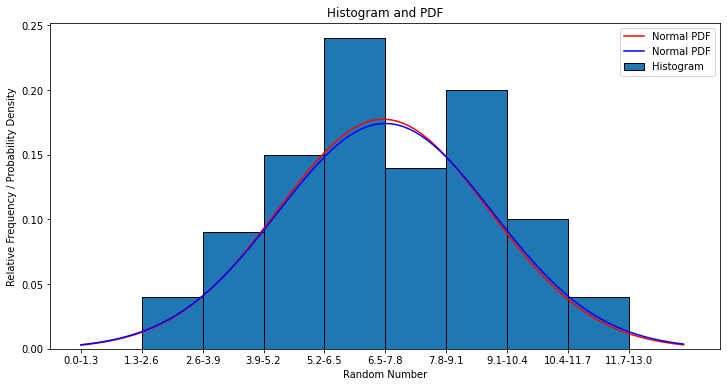

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random numbers: [7.305234732885449, 5.229648157848022, 8.109813874623661, 3.036078637030721, 4.693286812214546, 4.742538515160179, 6.1344483994006, 8.71259765353329, 5.814452579907522, 4.406363604665856, 6.128267847802523, 8.638723347200584, 5.206074633701991, 6.762649643003071, 5.168766549499293, 8.128406222296377, 5.460731354678369, 5.8771943695187, 8.217097018715261, 8.361078607068702, 7.869290472605975, 10.318449417565494, 8.357163390499714, 5.0549614910446, 2.1734705436344433, 3.7108118512177053, 5.360347340242475, 9.56652335059879, 6.041716265325241, 5.129523780948119, 5.067573890225146, 2.018244547601525, 7.90883017849419, 6.062320546492131, 9.670293920413664, 9.126280897181893, 6.5676968007381635, 5.134639665493589, 7.382015910176008, 3.064552151657449, 4

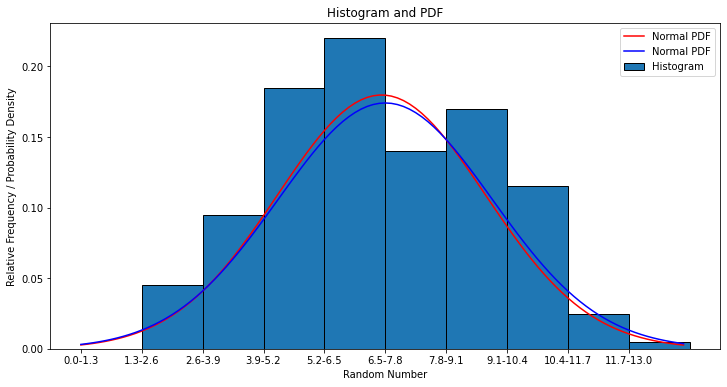

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random numbers: [7.469038087787492, 10.441114664741141, 6.066506871741762, 9.807026404039707, 7.1290629817746485, 8.266191351360154, 3.2146632007065548, 7.559403527682573, 5.153973778374636, 8.628206636846285, 3.051020162767356, 2.7588745141108517, 7.3836298213761395, 4.847394219238535, 9.225587685454016, 5.60133539986883, 3.0204963615917073, 4.629812874982179, 7.934567380971504, 5.369010842301025, 4.331029276773344, 5.672582750621315, 9.41742158854456, 7.886345578209795, 8.394603061854948, 9.097048564987997, 3.8194179402895, 3.9862256345055713, 3.8702117586941847, 7.191632112848185, 8.635993646863119, 9.486629012181691, 10.497083253267046, 4.874939972683605, 4.568435679206331, 9.331228032577728, 5.235197840938657, 7.539203912081633, 5.086117582179972, 5.31489322

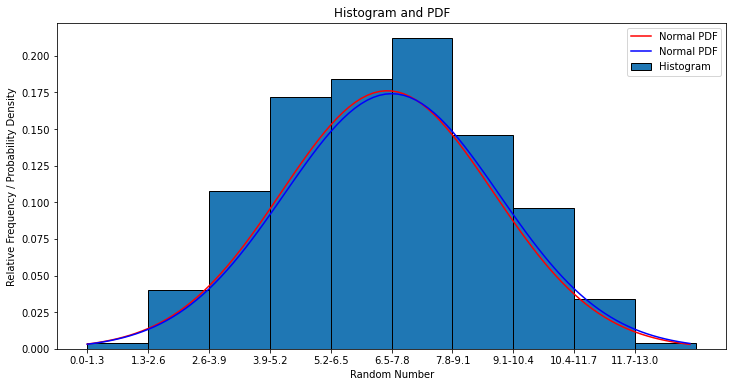

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random numbers: [7.926605781918885, 4.784515718882259, 9.593446441316708, 9.039827909568213, 5.80678761597529, 6.900710716082512, 5.942218103144306, 8.17869830256124, 10.48391869126421, 6.285012249434299, 8.056121505176531, 3.766053164554939, 8.989967863172733, 6.909275812887966, 8.2198998031593, 2.163344754684904, 8.906817879919611, 6.025806630024019, 7.857702266369036, 2.422811752054322, 9.53341066867008, 6.05735410938499, 11.535084432421277, 3.1659194980613483, 6.793034349270151, 7.836755162114694, 3.6072402364136087, 8.781037291549005, 5.471987832236411, 4.928390719042942, 3.1268059907613273, 6.424412118508492, 4.513474922904483, 8.127292197002362, 6.791765077022239, 5.082247229815913, 7.434344097717064, 8.221747765554687, 6.576431975593488, 7.12318469383361

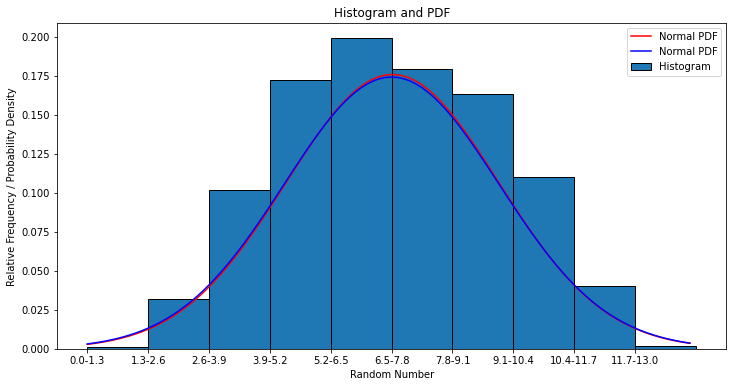

In [9]:
k1 = 2
k2 = 1
k3 = 7
k4 = 3

n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    random_numbers = []

    for _ in range(n):
        # Generate random numbers 
        random_number = t_normal(k1, k2, k3, k4)
        random_numbers.append(random_number)

        mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(k1, k2, k3, k4, random_numbers)

    aggregate()

    left_boundary = 0  # Minimum boundary of the range
    right_boundary = 13  # Maximum boundary of the range
    num_plots = 10  # Number of intervals (bins)

    frequencies = relative_frequencies(random_numbers, left_boundary, right_boundary, num_plots)

    draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_theory_value, mean_theory_value, std_dev_sample, mean_sample_value)
    
    #draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, 1, 3)

    relative_err_mean_list.append(relative_err)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)
    

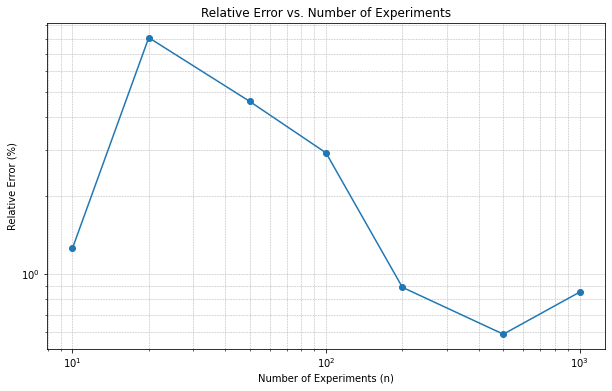

In [113]:
#RELATIVE ERROR FOR EXPECTATION
draw_graph_err(n_values, relative_err_mean_list) #drawing graph of relative error against n experiments.

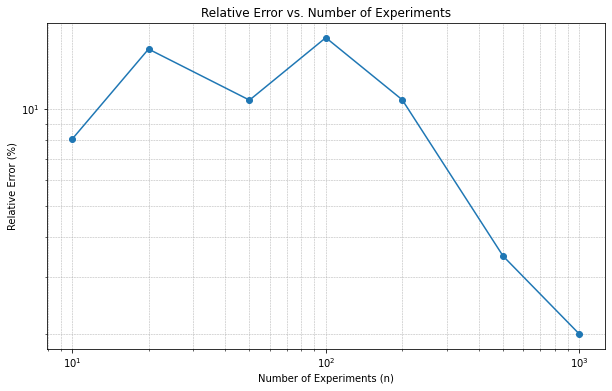

In [114]:
#RELATIVE ERROR FOR VARIANCE
draw_graph_err(n_values, relative_err_var_list)

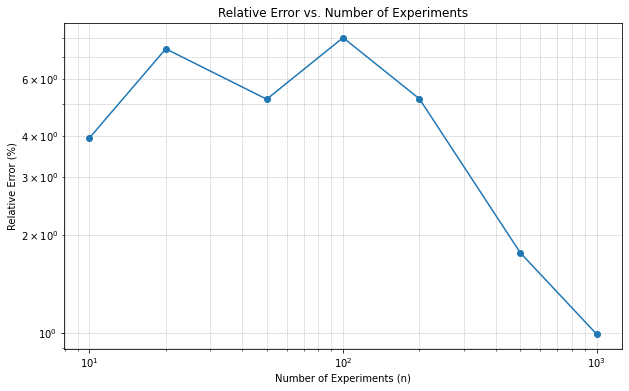

In [115]:
#RELATIVE ERROR FOR STANDARD DEVIATION
draw_graph_err(n_values, relative_err_std_list)

In [129]:
def trapezoidal_rule(x_values, y_values):
    area = 0
    for i in range(1, len(x_values)):
        # Trapezoidal approximation for each interval
        area += (x_values[i] - x_values[i - 1]) * (y_values[i] + y_values[i - 1]) / 2
    return area


x_values = [mean_theory_value - 3 * std_dev_theory_value + i * (6 * std_dev_theory_value) / 100 for i in range(100)]
y_values = [normal_dis_function(std_dev_theory_value, mean_theory_value, x) for x in x_values]

# Calculate the area under the curve
area = trapezoidal_rule(x_values, y_values)

# Display the area
print(f"Estimated area under the PDF curve: {area:.5f}")

Estimated area under the PDF curve: 0.99700
